# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [11]:
housing = pd.read_csv("../data/housing.csv")

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

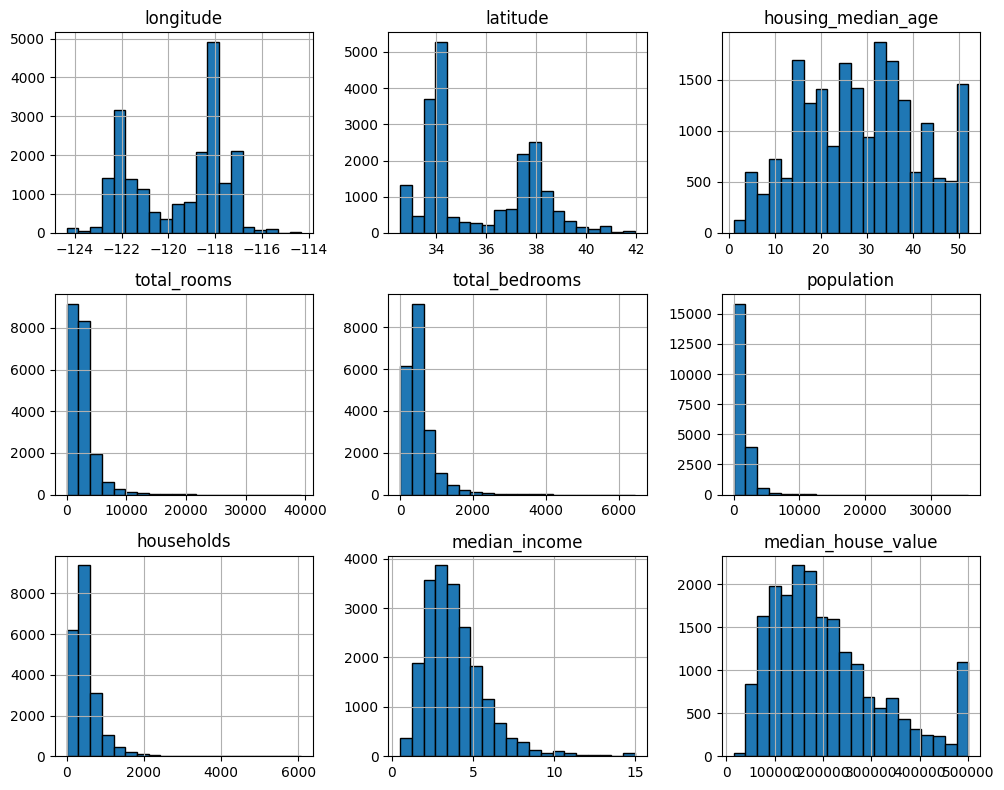

In [13]:
# all numeric histograms in one grid
housing.hist(bins=20, figsize=(10, 8), edgecolor="black")
plt.tight_layout()
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [14]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:

housing["total_bedrooms"].isna().sum() # 207
# drop NaN, it's only 1% of the dataset 
housing = housing.dropna(subset=["total_bedrooms"])


In [16]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [17]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

housing["rooms_per_household"]

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20433, dtype: float64

In [18]:
housing["population_per_household"] = housing["population"] / housing["households"]
housing["population_per_household"].head()

0    2.555556
1    2.109842
2    2.802260
3    2.547945
4    2.181467
Name: population_per_household, dtype: float64

In [19]:
housing["bedrooms_per_household"] = housing["total_bedrooms"] / housing["households"]
housing["bedrooms_per_household"].head()

0    1.023810
1    0.971880
2    1.073446
3    1.073059
4    1.081081
Name: bedrooms_per_household, dtype: float64

3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [20]:
housing["rooms_per_household"].sort_values(ascending=False) # 1914, 1979


1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
            ...    
14818      1.130435
17820      1.130435
3126       1.000000
8219       0.888889
5916       0.846154
Name: rooms_per_household, Length: 20433, dtype: float64

In [21]:
housing["rooms_per_household"].sort_values(ascending=True) # 5916, 8219 

5916       0.846154
8219       0.888889
3126       1.000000
14818      1.130435
17820      1.130435
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: rooms_per_household, Length: 20433, dtype: float64

In [22]:
housing["rooms_per_household"] = housing["rooms_per_household"].drop(index=[1914, 1979, 5916, 8219])

In [23]:
housing["rooms_per_household"].sort_values(ascending=True)

3126      1.000000
14818     1.130435
17820     1.130435
4552      1.260870
4550      1.378486
           ...    
12447    62.422222
1914           NaN
1979           NaN
5916           NaN
8219           NaN
Name: rooms_per_household, Length: 20433, dtype: float64

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

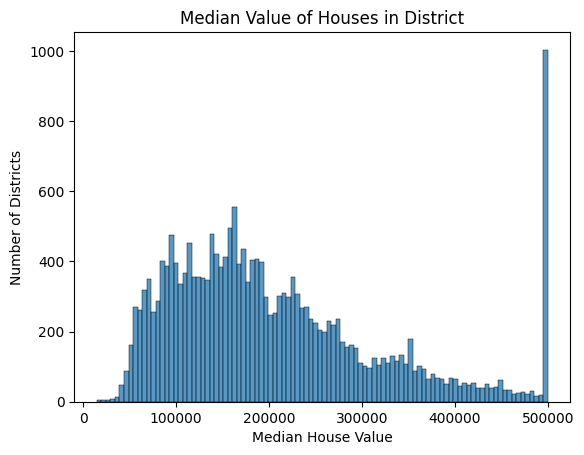

In [24]:
sns.histplot(housing["median_house_value"], bins=100)
plt.xlabel("Median House Value")
plt.title("Median Value of Houses in District")
plt.ylabel("Number of Districts")
plt.show()

2. Check out what variables correlates the most with "median house value"

In [25]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'population_per_household', 'bedrooms_per_household'],
      dtype='object')

In [26]:
# Pick predictors and outcome
features = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
            "population", "households", "median_income",
            "rooms_per_household", "population_per_household", "bedrooms_per_household"
            ]
outcome = "median_house_value"

# Calculate correlations with outcome
correlations = housing[features + [outcome]].corr(numeric_only=True)[outcome].sort_values(ascending=False)

print(correlations)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.170930
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
bedrooms_per_household     -0.046739
latitude                   -0.144638
Name: median_house_value, dtype: float64


3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

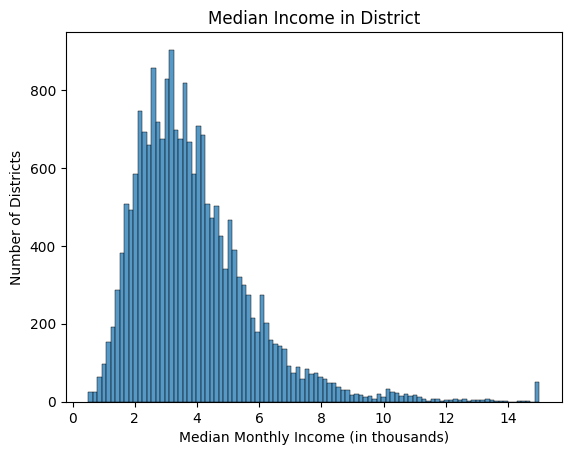

In [27]:
sns.histplot(housing["median_income"], bins=100)
plt.xlabel("Median Monthly Income (in thousands)")
plt.title("Median Income in District")
plt.ylabel("Number of Districts")
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

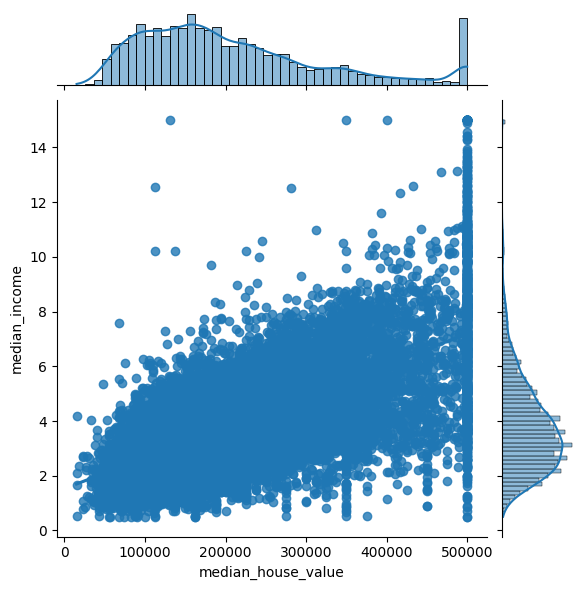

In [28]:
sns.jointplot(x="median_house_value",
              y="median_income", 
              data=housing,
              kind="reg")

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

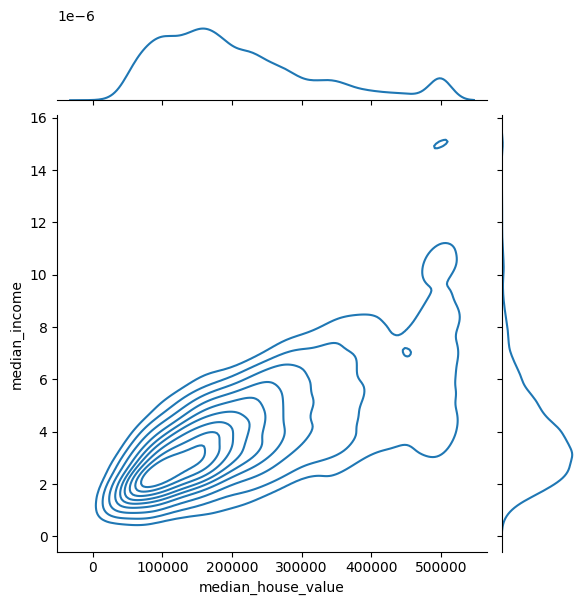

In [29]:
sns.jointplot(x="median_house_value",
              y="median_income", 
              data=housing,
              kind="kde")

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [30]:
housing["income_cat"] = pd.qcut(x=housing["median_income"], q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=["Low", "Below_Average", "Above_Average", "High", "Very High"])

housing["income_cat"].value_counts()


income_cat
Low              5109
Above_Average    5109
Below_Average    5108
High             4085
Very High        1022
Name: count, dtype: int64

2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

<Axes: xlabel='income_cat', ylabel='count'>

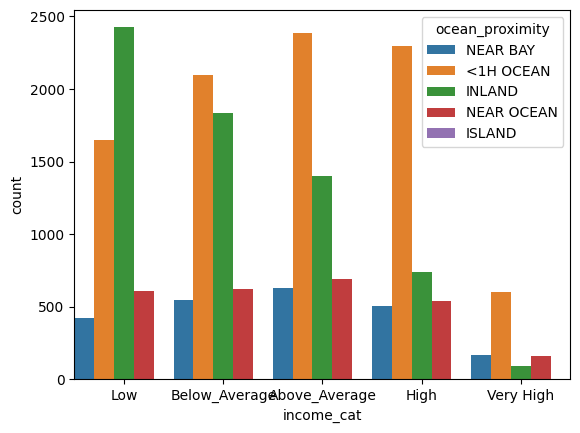

In [31]:
sns.countplot(
    data=housing,
    x="income_cat",
    hue="ocean_proximity",
    width=1.0
)
# there's a clear negative correlation between living inland and having a high income
# and very high income has less inland than all other buckets (relative to its sample size), 
# with more residents lving near the ocean and near the bay. ocean front property is pricy! 

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

<Axes: xlabel='income_cat', ylabel='median_house_value'>

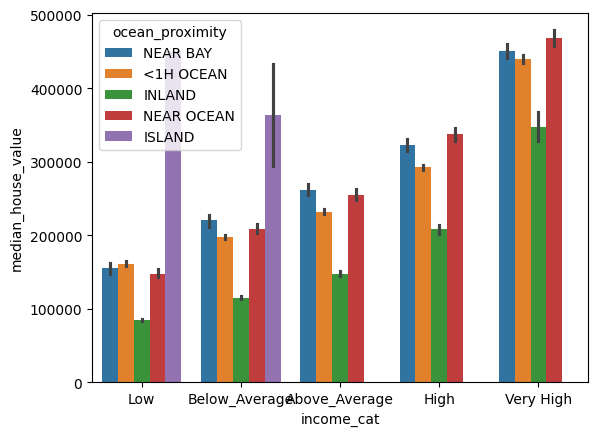

In [32]:
sns.barplot(data=housing,
            y="median_house_value",
            x="income_cat",
            hue="ocean_proximity"
            )


# Here we can see that on average on average, houses on islands in low-income areas are expensive 
# this wasn't shown on the first graph
# For very high income, prices for median house values are higest near the ocean or near the bay


4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [33]:
pivoted_table = pd.pivot_table(housing, 
               index="income_cat",
               columns="ocean_proximity", 
               values="median_house_value",
               aggfunc="mean")


pivoted_table = pivoted_table.drop(columns="ISLAND")

pivoted_table

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_1956/1079079538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted_table = pd.pivot_table(housing,


ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337.076923,84820.626650,155122.052133,148027.826514
Below_Average,197236.013829,115124.088283,220196.177656,208665.190096
Above_Average,232278.358759,147846.891351,261965.251582,255293.813584
High,292208.766217,208095.566622,322566.033663,337446.227778
Very High,439784.235489,347571.736842,451015.078788,468739.723270


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

<Axes: xlabel='ocean_proximity', ylabel='income_cat'>

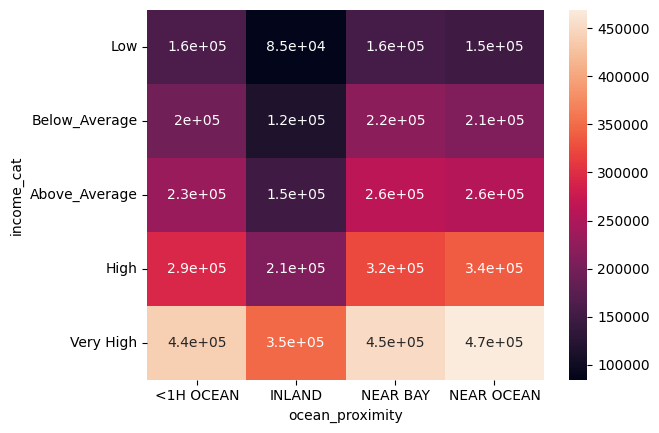

In [34]:
sns.heatmap(pivoted_table, annot=True)

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [ ]:
housing = housing.drop(columns=["income_cat"])

KeyError: "['income_cat'] not found in axis"

In [69]:
housing = housing.dropna()

housing = housing.dropna().reset_index(drop=True)

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [57]:
import scipy.stats as stats

housing.select_dtypes(float).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467,1.081081


In [58]:
z_scored = housing.select_dtypes(float).apply(lambda x: stats.zscore(x))

z_scored.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_household
0,-1.327178,1.051835,0.982245,-0.803953,-0.970467,-0.973604,-0.977135,2.344991,2.129043,0.741063,-0.049440,-0.185732
1,-1.322187,1.042473,-0.606063,2.041934,1.348104,0.861142,1.670222,2.332460,1.313782,0.387873,-0.092137,-0.322580
2,-1.332169,1.037792,1.855815,-0.535335,-0.825704,-0.820046,-0.843721,1.782799,1.258334,1.358446,-0.025807,-0.054926
3,-1.337160,1.037792,1.855815,-0.623654,-0.718913,-0.765330,-0.733850,0.932878,1.164766,0.188652,-0.050169,-0.055946
4,-1.337160,1.037792,1.855815,-0.462117,-0.612121,-0.759153,-0.629212,-0.013181,1.172563,0.408571,-0.085276,-0.034806


3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity

In [59]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [65]:
dummies = pd.get_dummies(data=housing["ocean_proximity"], drop_first=True)
dummies

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
20635,True,False,False,False
20636,True,False,False,False
20637,True,False,False,False
20638,True,False,False,False


4. Save our predicting variable to `y`.

In [ ]:
y = z_scored["median_house_value"]

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [67]:
X = pd.concat([z_scored, dummies], axis=1)

X = X.drop(columns="median_house_value")

X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327178,1.051835,0.982245,-0.803953,-0.970467,-0.973604,-0.977135,2.344991,0.741063,-0.049440,-0.185732,False,False,True,False
1,-1.322187,1.042473,-0.606063,2.041934,1.348104,0.861142,1.670222,2.332460,0.387873,-0.092137,-0.322580,False,False,True,False
2,-1.332169,1.037792,1.855815,-0.535335,-0.825704,-0.820046,-0.843721,1.782799,1.358446,-0.025807,-0.054926,False,False,True,False
3,-1.337160,1.037792,1.855815,-0.623654,-0.718913,-0.765330,-0.733850,0.932878,0.188652,-0.050169,-0.055946,False,False,True,False
4,-1.337160,1.037792,1.855815,-0.462117,-0.612121,-0.759153,-0.629212,-0.013181,0.408571,-0.085276,-0.034806,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758225,1.800827,-0.288401,-0.444727,-0.389044,-0.512049,-0.443478,-1.216697,-0.176802,-0.048956,0.102893,True,False,False,False
20636,-0.818115,1.805508,-0.844309,-0.887695,-0.920631,-0.943598,-1.008527,-0.692044,0.329117,0.004899,0.583715,True,False,False,False
20637,-0.823106,1.777421,-0.923725,-0.175194,-0.125624,-0.369082,-0.174034,-1.143145,-0.101009,-0.071465,0.067999,True,False,False,False
20638,-0.873014,1.777421,-0.844309,-0.355493,-0.305984,-0.603830,-0.393775,-1.055115,-0.042315,-0.090856,0.204579,True,False,False,False


# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [70]:
housing = housing.dropna(subset=["rooms_per_household"])
housing.isna().sum()


longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
population_per_household    0
bedrooms_per_household      0
dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [72]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Predictions
y_pred = lm.predict(X_test)
predictions = lm.predict(X_test)
print("predicted values:", predictions)

# Print coefs
print("intercept:", lm.intercept_, "coeficent:", lm.coef_)

# R² score
r2 = lm.score(X_test, y_test)

# Errors
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

predicted values: [ 0.11915096  0.63499617 -0.55318692 ... -0.99005758 -0.88948425
  1.23116733]
intercept: 0.1021702879554317 coeficent: [-0.48340777 -0.49754295  0.11840278 -0.04827124  0.16455526 -0.43011879
  0.34719534  0.66847105 -0.07591059  0.01025242  0.11014802 -0.31591262
  1.25502756 -0.04272967  0.02603331]
R²: 0.6422997445597595
MSE: 0.3458874759807928
RMSE: 0.5881219907304884
MAE: 0.419414612696305


3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

Text(0, 0.5, 'Predicted Values')

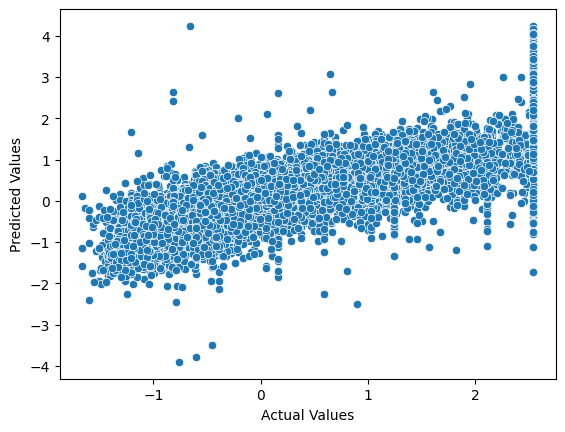

In [81]:
y_train_pred = lm.predict(X_train)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [ ]:
from sklearn import metrics

#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

2. Print the mean_squared_error and R^2-score again. What has happened?

3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.